In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# environment constants
rho = 1.225  # kg/m^3, sea level air density
temp_C = 15  # standard sea level temperature
temp_K = 288.2  # standard sea level temperature
pressure = 101325  # Pa, standard sea level pressure
gravity = 9.80665  # m/s^2, acceleration of gravity
speed_of_sound = 340.3  # m/s
dynamic_viscosity = 1.789e-5  # kg/m/s
kinematic_viscosity = 1.460e-5  # m^2/s
gas_constant = 287.1  # J/kg/K
temp_lapse_rate = 0.0065  # K/m, temperature lapse rate
molar_mass = 0.0289652 # kg/mol

In [36]:
# adjust air properties for current conditions and alitutde
ground_temp_C = -7  # C
ground_pressure = 103081.67  # Pa
height_m = 40  # m, keep below 18km=18000m

ground_temp_K = ground_temp_C+273.15
print(f"Ground Temperature : {ground_temp_K:.2f} K")
print(f"Ground Pressure : {ground_pressure:.0f} Pa")
ground_rho = ground_pressure/(gas_constant*ground_temp_K)
print(f"Ground Air Density : {ground_rho:.4f} kg/m^3")
# https://en.wikipedia.org/wiki/Density_of_air
height_temp = ground_temp_K-temp_lapse_rate*height_m
print(f"Temperature at {height_m:.1f}m : {height_temp:.2f} K ({height_temp-273.15:.2f} C)")
height_pressure = ground_pressure*((height_temp/ground_temp_K)**(((gravity)/(gas_constant*temp_lapse_rate))-1))
print(f"Pressure at {height_m:.1f}m : {height_pressure:.0f} Pa")
height_rho = ground_rho * ((height_temp/ground_temp_K)**((gravity)/(gas_constant*temp_lapse_rate)))
print(f"Density at {height_m:.1f}m : {height_rho:.4f} kg/m^3")
# Sutherland Viscosity Law, https://www.afs.enea.it/project/neptunius/docs/fluent/html/ug/node294.htm
c1 = 1.458e-6
c2 = 110.4
height_dynamic_viscosity = (c1*(height_temp**(3/2)))/(height_temp+c2)
print(f"Dynamic Viscosity at {height_m:.1f}m : {height_dynamic_viscosity:e} kg/m*s")
height_kinematic_viscosity = height_dynamic_viscosity/rho
print(f"Kinematic Viscosity at {height_m:.1f}m : {height_kinematic_viscosity:e} m^2/s")

# Uncomment to use current environment estimates for the calculations
# rho = height_rho
# kinematic_viscosity = height_kinematic_viscosity

Ground Temperature : 266.15 K
Ground Pressure : 103082 Pa
Ground Air Density : 1.3490 kg/m^3
Temperature at 40.0m : 265.89 K (-7.26 C)
Pressure at 40.0m : 102654 Pa
Density at 40.0m : 1.3421 kg/m^3
Dynamic Viscosity at 40.0m : 1.679917e-05 kg/m*s
Kinematic Viscosity at 40.0m : 1.251690e-05 m^2/s


In [43]:
# plane variables
m_uav = 1.828  # kg, weight
Cd_0 = 0.02  # parasitic drag, zero-lift drag, usually 0.0001-0.05
Cl_max = 1.2  # maximum coefficient of lift
wingspan = 1.8  # m, b
wing_area = 0.36  # m^2, wing area, S, 1 dm^2 = 0.01 m^2
oswald_efficiency = 0.84  # oswald efficiency number, usually between 0.65-0.85 for low speeds M<0.2
chord = 0.238  # m
area_correction_factor = 0.8  # disk area that recieves free stream airflow

# Energy
# battery mass, kg
# battery nominal voltage, V
# battery capacity, Ah
# battery C rating, C

# UAS 17 Turnigy 3s 2200 25C
# m_battery = 0.188; batt_volt = 3*3.5; batt_Ah = 2.2; batt_C_rate = 25
# UAS 25 Multistar 3s 5200 10C
# m_battery = 0.322; batt_volt = 3*3.5; batt_Ah = 5.2; batt_C_rate = 10
# LUKE 6&7 Zeee 3s 5000 50C
# m_battery = 0.361; batt_volt = 3*3.5; batt_Ah = 5.0; batt_C_rate = 50
# UAS 32&33 Zippy 4s 3300 40C
# m_battery = 0.359; batt_volt = 4*3.5; batt_Ah = 3.3; batt_C_rate = 40
# UAS 10-13 Gen Ace 5s 5500 45C
m_battery = 0.636; batt_volt = 5*3.5; batt_Ah = 5.5; batt_C_rate = 45

# Payload
m_payload = 0.0  # payload mass, kg

# Useful calculated values
m_total = m_uav+m_battery+m_payload  # total mass, kg
print(f"Total Mass: {m_total:.4f} kg")
w_total = gravity*m_total  # total weight, N
print(f"Total Weight: {w_total:.4f} N")
batt_Wh = batt_volt*batt_Ah  # watt-hours, Wh
print(f"Battery Wh: {batt_Wh:.2f} Wh")
batt_energy = batt_Wh*3600  # energy, J
print(f"Battery energy: {batt_energy:.0f} J")
batt_energy_density = batt_Wh/m_battery  # energy density, Wh/kg
print(f"Battery energy density: {batt_energy_density:.2f} Wh/kg")
batt_max_watt = batt_volt*batt_Ah*batt_C_rate
print(f"Battery maximum wattage: {batt_max_watt:.2f} W")
aspect_ratio = wingspan**2 / wing_area  # wingspan^2/wing area
print(f"Aspect Ratio: {aspect_ratio:.2f}")
# correction factor for the change in drag with lift for a 3D wing when compared to an ideal wing
oswald_efficiency_estimate = 1.78*(1- 0.045*(aspect_ratio)**0.68)-0.64
print(f"Oswald efficiency estimate: {oswald_efficiency_estimate:.3f}")
K = 1/(np.pi*oswald_efficiency*aspect_ratio)
LD_max = 1/(2*np.sqrt(K*Cd_0))
print(f"Max Lift/Drag: {LD_max:.4f} L/D")
min_tr_spd = np.sqrt((2*w_total*np.sqrt(K/Cd_0))/(rho*wing_area))
print(f"Min Thrust Spd: {min_tr_spd:.4f} m/s")
min_tw = 1/LD_max
print(f"Min Thrust/Weight: {min_tw:.4f} T/W")
min_power_spd = np.sqrt((2*w_total*np.sqrt(K/(3*Cd_0)))/(rho*wing_area))
print(f"Min Power Spd: {min_power_spd:.4f} m/s")
Re_LD_max = min_tr_spd*chord/kinematic_viscosity
print(f"Re at Max L/D: {Re_LD_max:e}")
M_LD_max = min_tr_spd/speed_of_sound
print(f"Mach number at Max L/D: {M_LD_max:.4f}")
# increasing the mass increase the stall speed
stall_spd = np.sqrt((2*w_total)/(rho*wing_area*Cl_max))
print(f"Stall Spd: {stall_spd:.4f} m/s")

Total Mass: 2.4640 kg
Total Weight: 24.1636 N
Battery Wh: 96.25 Wh
Battery energy: 346500 J
Battery energy density: 151.34 Wh/kg
Battery maximum wattage: 4331.25 W
Aspect Ratio: 9.00
Oswald efficiency estimate: 0.783
Max Lift/Drag: 17.2302 L/D
Min Thrust Spd: 12.0468 m/s
Min Thrust/Weight: 0.0580 T/W
Min Power Spd: 9.1536 m/s
Re at Max L/D: 2.090733e+05
Mach number at Max L/D: 0.0354
Stall Spd: 9.1297 m/s


In [44]:
def power_required(forward_airspeed):
    A_rotors = area_correction_factor * 0.25*np.pi*(0.0254*9)**2  # area of the prop
    dynamic_pressure = 0.5*rho*forward_airspeed**2  # N/m^2
    drag_parasitic = dynamic_pressure*wing_area*Cd_0  # N
    drag_induced = w_total**2 / (dynamic_pressure*wing_area*np.pi*oswald_efficiency*aspect_ratio)  # N
    drag_total = drag_parasitic + drag_induced # N
    # Wake velocity is calculated from the pressure drop over the rotor and bernoulli's equation
    wake_velocity = np.sqrt( (2*drag_total)/(rho*A_rotors) + forward_airspeed**2)
    # Using thrust equations from pressure and momentum, this relation is derived
    rotor_velocity = 0.5*(forward_airspeed+wake_velocity)
    # Power is the KE imparted on the air and the change in potential energy.
    power = 0.5*rho*A_rotors*rotor_velocity*wake_velocity**2
    return power

Minimum drag airspeed is 12.05 m/s (62.20 mah/km) drawing 47.21 W
Minimum drag: 88.42 km in 122.33 minutes.
Maximum range airspeed is 9.66 m/s (55.70 mah/km) drawing 33.91 W
Maximum range: 98.74 km in 170.32 minutes.


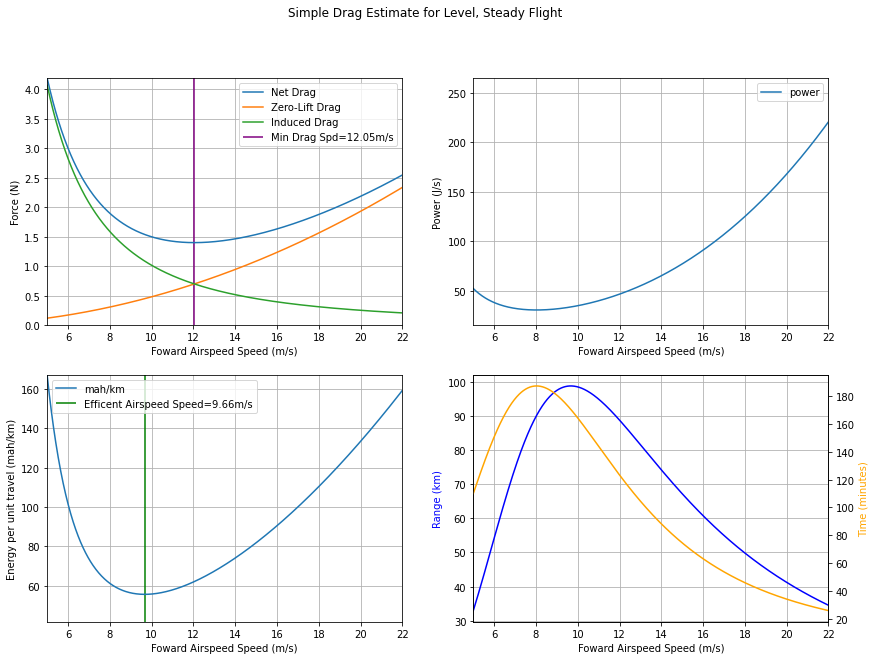

In [45]:
# thrust for level steady flight
min_airspeed = 5
max_airspeed = 22
points = 1000
forward_airspeed = np.linspace(min_airspeed, max_airspeed, points)  # m/s
dynamic_pressure = 0.5*rho*forward_airspeed**2  # N/m^2
drag_parasitic = dynamic_pressure*wing_area*Cd_0  # N
drag_induced = w_total**2 / (dynamic_pressure*wing_area*np.pi*oswald_efficiency*aspect_ratio)  # N
drag_total = drag_parasitic + drag_induced  # N

power = power_required(forward_airspeed)
time = batt_energy/power/60  # minutes
distance = time*forward_airspeed*60/1000 # km

# power is J/s and the time is related to s=m/v, so P/v is energy per distance or J/m
energy_per_distance = power/abs(forward_airspeed)
# convert J/m to mah/km
energy_per_distance = 1000*energy_per_distance/(3.6*batt_volt)

min_tr_power = power_required(min_tr_spd)
min_tr_energy_per_distance = min_tr_power/abs(min_tr_spd)
min_tr_energy_per_distance = 1000*min_tr_energy_per_distance/(3.6*batt_volt)

print(f"Minimum drag airspeed is {min_tr_spd:.2f} m/s ({min_tr_energy_per_distance:.2f} mah/km) drawing {min_tr_power:.2f} W")
min_tr_time = batt_energy/min_tr_power/60  # minutes
min_tr_distance = min_tr_time*min_tr_spd*60/1000 # km
print(f"Minimum drag: {min_tr_distance:.2f} km in {min_tr_time:.2f} minutes.")

range_arg = np.argmin(energy_per_distance)
range_energy_per_distance = energy_per_distance[range_arg]
range_spd = forward_airspeed[range_arg]
range_power = power[range_arg]

print(f"Maximum range airspeed is {range_spd:.2f} m/s ({range_energy_per_distance:.2f} mah/km) drawing {range_power:.2f} W")
range_time = batt_energy/range_power/60  # minutes
range_distance = range_time*range_spd*60/1000 # km
print(f"Maximum range: {range_distance:.2f} km in {range_time:.2f} minutes.")


fig = plt.figure(figsize=(14,10))
(ax1, ax2), (ax3, ax4) = fig.subplots(nrows=2, ncols=2)
fig.suptitle(f"Simple Drag Estimate for Level, Steady Flight")
ax1.plot(forward_airspeed, drag_total, label="Net Drag")
ax1.plot(forward_airspeed, drag_parasitic, label="Zero-Lift Drag")
ax1.plot(forward_airspeed, drag_induced, label="Induced Drag")
ymin=0; ymax=max(drag_total)
ax1.vlines(x=min_tr_spd, ymin=ymin, ymax=ymax, colors='purple', label=f"Min Drag Spd={min_tr_spd:.2f}m/s")
ax1.set_ylim([ymin,ymax])
ax1.set_xlim([min_airspeed, max_airspeed])
ax1.grid(); ax1.set_ylabel("Force (N)"); ax1.set_xlabel("Foward Airspeed Speed (m/s)"); ax1.legend()

ax2.plot(forward_airspeed, power, label="power")
ymin=0.5*np.min(power); ymax=1.2*np.max(power)
ax2.set_ylim([ymin, ymax]); ax2.set_xlim([min_airspeed, max_airspeed])
ax2.grid(); ax2.set_ylabel("Power (J/s)"); ax2.set_xlabel("Foward Airspeed Speed (m/s)"); ax2.legend()

ax3.plot(forward_airspeed, energy_per_distance, label="mah/km")
ymin=0.75*range_energy_per_distance; ymax=3*range_energy_per_distance
ax3.vlines(x=range_spd, ymin=ymin, ymax=ymax, colors='green', label=f"Efficent Airspeed Speed={range_spd:.2f}m/s")
ax3.set_ylim([ymin, ymax]); ax3.set_xlim([min_airspeed, max_airspeed])
ax3.grid(); ax3.set_ylabel("Energy per unit travel (mah/km)"); ax3.set_xlabel("Foward Airspeed Speed (m/s)"); ax3.legend()

ax4.plot(forward_airspeed, distance, label="Range [km]", color="blue")
ax4.set_xlim([min_airspeed, max_airspeed])
ax4.set_ylabel("Range (km)", color="blue")
ax4r = ax4.twinx()
ax4r.plot(forward_airspeed, time, label="Time [min]", color="orange")
ax4r.set_ylabel("Time (minutes)", color="orange")
ax4.set_xlabel("Foward Airspeed Speed (m/s)"); ax4.grid()
